In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('Compiled_descriptors.csv')

In [4]:
df=df.iloc[:,1:]
df['IC50']=pd.read_csv("IC50 (1).csv")

In [ ]:
pip install stuptools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement stuptools (from versions: none)
ERROR: No matching distribution found for stuptools


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [5]:
df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class,IC50
0,359.4,8.357,28.24,0.657,1.034,0.658,1.123,0.083,7.0,15.0,...,-2.11,0.83,0.83,0.7,0.67,0.61,0.17,0.88,0,1600.00
1,368.4,7.839,30.56,0.650,1.017,0.667,1.115,0.080,6.0,16.0,...,-2.87,1.00,1.00,0.6,1.00,0.80,0.33,1.00,1,3900.00
2,370.5,6.501,33.76,0.592,0.992,0.636,1.124,0.080,8.0,10.0,...,-5.32,0.83,1.00,1.0,1.00,0.94,0.17,0.88,2,24700.00
3,249.3,7.334,22.23,0.654,0.988,0.694,1.117,0.123,0.0,17.0,...,-4.72,1.00,1.00,0.6,1.00,0.87,0.67,1.00,2,11900.00
4,269.8,8.702,21.53,0.694,1.002,0.732,1.113,0.123,1.0,17.0,...,-4.95,1.00,1.00,0.6,1.00,0.76,0.83,1.00,2,16700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,304.3,8.949,23.16,0.681,1.047,0.669,1.116,0.104,6.0,13.0,...,-1.32,1.00,1.00,0.4,1.00,0.77,0.33,1.00,2,33000.00
565,365.6,7.947,30.42,0.661,0.984,0.729,1.104,0.093,2.0,15.0,...,-4.75,1.00,1.00,0.8,1.00,0.90,0.33,1.00,1,3300.00
566,265.4,6.805,24.28,0.623,0.984,0.669,1.123,0.116,4.0,16.0,...,-3.84,1.00,1.00,0.8,1.00,0.90,1.00,1.00,0,600.00
567,292.3,8.119,21.45,0.596,1.056,0.583,1.155,0.100,8.0,4.0,...,-0.24,0.67,0.83,0.9,0.67,0.72,0.33,0.75,2,7700.00


In [7]:
model=RandomForestRegressor()

In [8]:
main_df=pd.concat([df],axis=1)

In [6]:
scalar=MinMaxScaler()
main_trf_df=scalar.fit_transform(df)



In [7]:
main_trf_df
main_df_=pd.DataFrame(main_trf_df,columns=df.columns)
main_df_['IC50']=df['IC50']
x=main_df_.drop('IC50',axis=1)
y=main_df_['IC50']

In [11]:
np.mean(cross_val_score(model,x,y,cv=10,scoring='r2'))

0.4343462231946825

In [12]:
main_df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class,IC50
0,359.4,8.357,28.24,0.657,1.034,0.658,1.123,0.083,7.0,15.0,...,-2.11,0.83,0.83,0.7,0.67,0.61,0.17,0.88,0,1600.00
1,368.4,7.839,30.56,0.650,1.017,0.667,1.115,0.080,6.0,16.0,...,-2.87,1.00,1.00,0.6,1.00,0.80,0.33,1.00,1,3900.00
2,370.5,6.501,33.76,0.592,0.992,0.636,1.124,0.080,8.0,10.0,...,-5.32,0.83,1.00,1.0,1.00,0.94,0.17,0.88,2,24700.00
3,249.3,7.334,22.23,0.654,0.988,0.694,1.117,0.123,0.0,17.0,...,-4.72,1.00,1.00,0.6,1.00,0.87,0.67,1.00,2,11900.00
4,269.8,8.702,21.53,0.694,1.002,0.732,1.113,0.123,1.0,17.0,...,-4.95,1.00,1.00,0.6,1.00,0.76,0.83,1.00,2,16700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,304.3,8.949,23.16,0.681,1.047,0.669,1.116,0.104,6.0,13.0,...,-1.32,1.00,1.00,0.4,1.00,0.77,0.33,1.00,2,33000.00
565,365.6,7.947,30.42,0.661,0.984,0.729,1.104,0.093,2.0,15.0,...,-4.75,1.00,1.00,0.8,1.00,0.90,0.33,1.00,1,3300.00
566,265.4,6.805,24.28,0.623,0.984,0.669,1.123,0.116,4.0,16.0,...,-3.84,1.00,1.00,0.8,1.00,0.90,1.00,1.00,0,600.00
567,292.3,8.119,21.45,0.596,1.056,0.583,1.155,0.100,8.0,4.0,...,-0.24,0.67,0.83,0.9,0.67,0.72,0.33,0.75,2,7700.00


In [8]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [9]:
clf=RandomForestRegressor()

In [10]:
l=list(abs(df.corr()['IC50']).sort_values().tail(26).index)

In [51]:
abs(df.corr(method='spearman')['IC50']).sort_values().tail(26)

P_VSA_LogP_1     0.222437
F03[N-N]         0.223035
nROH             0.224425
CATS2D_04_DD     0.227731
F08[N-O]         0.228297
O-060            0.228685
P_VSA_MR_6       0.230820
nCsp2            0.233272
CATS2D_06_DA     0.234917
GATS2i           0.236114
MATS2i           0.237587
SdsCH            0.237846
VE3sign_Dt       0.252337
P_VSA_v_3        0.253377
C-016            0.257110
P_VSA_s_4        0.260128
P_VSA_i_2        0.261348
GATS2p           0.262121
VE3sign_Dz(p)    0.262289
P_VSA_e_2        0.271505
MATS2p           0.285432
CATS2D_04_DA     0.290955
VE3sign_D/Dt     0.297757
C-005            0.331193
Class            0.918836
IC50             1.000000
Name: IC50, dtype: float64

In [52]:
l

['Eta_FL_A',
 'Psi_i_1d',
 'SpMax2_Bh(p)',
 'SpMaxA_AEA(dm)',
 'MATS1v',
 'ChiA_D',
 'Vindex',
 'SpMin2_Bh(p)',
 'SpMin2_Bh(m)',
 'P_VSA_MR_6',
 'GATS2i',
 'VE2sign_B(m)',
 'P_VSA_s_4',
 'ChiA_Dt',
 'NsssCH',
 'SpMin2_Bh(e)',
 'C-008',
 'P_VSA_MR_3',
 'GATS2p',
 'PCR',
 'Uc',
 'nOHs',
 'nROH',
 'O-056',
 'Class',
 'IC50']

In [12]:
df_final=df[l]

In [13]:
x=df_final.drop(['IC50'],axis=1)
y=df_final['IC50']

In [14]:
from sklearn.model_selection import cross_val_score

In [19]:
m.append(np.mean(cross_val_score(clf,x,y,cv=10,scoring='r2')))

In [16]:
clf2=GradientBoostingRegressor()

In [11]:
df=df.rank()

In [17]:
x

,Eta_FL_A,Psi_i_1d,SpMax2_Bh(p),SpMaxA_AEA(dm),MATS1v,ChiA_D,Vindex,SpMin2_Bh(p),SpMin2_Bh(m),P_VSA_MR_6,...,SpMin2_Bh(e),C-008,P_VSA_MR_3,GATS2p,PCR,Uc,nOHs,nROH,O-056,Class
0,307.5,285.5,206.0,418.0,552.5,324.5,477.0,216.0,243.0,77.0,...,244.0,527.5,233.5,557.5,113.5,135.0,276.0,498.0,257.0,72.0
1,439.5,285.5,240.5,274.5,396.0,253.0,378.0,254.5,259.0,234.5,...,269.5,255.0,233.5,272.0,502.5,165.0,276.0,498.0,257.0,214.5
2,20.0,285.5,66.0,383.0,339.0,324.5,492.5,84.0,421.0,11.0,...,97.0,255.0,233.5,401.0,33.5,38.5,276.0,498.0,257.0,427.5
3,520.5,285.5,306.0,466.0,265.0,521.5,408.0,316.0,503.5,187.5,...,424.0,255.0,233.5,389.5,410.0,234.5,276.0,226.5,257.0,427.5
4,543.0,285.5,180.0,491.5,258.0,539.0,488.5,172.5,441.0,187.5,...,296.0,255.0,233.5,340.5,416.5,234.5,276.0,226.5,257.0,427.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,294.5,285.5,101.0,517.0,562.0,495.5,528.5,70.0,54.0,62.0,...,92.0,550.0,504.5,539.0,44.5,77.5,558.0,498.0,532.0,427.5
565,145.5,285.5,513.5,525.0,277.0,373.0,268.5,82.0,163.5,158.0,...,135.0,255.0,233.5,104.5,433.5,135.0,276.0,226.5,257.0,214.5
566,317.0,285.5,63.0,447.5,22.0,521.5,513.0,54.0,65.0,349.0,...,73.0,255.0,233.5,3.0,416.5,165.0,276.0,226.5,257.0,72.0
567,87.0,285.5,5.0,548.0,7.0,495.5,568.0,13.0,6.0,3.0,...,6.0,255.0,233.5,547.0,3.0,5.5,276.0,566.5,257.0,427.5


In [18]:
m=[]

In [20]:
m.append(np.mean(cross_val_score(clf2,x,y,cv=10,scoring='r2')))

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
clf3=LinearRegression()

In [23]:
m.append(np.mean(cross_val_score(clf3,x,y,cv=10,scoring='r2')))

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
clf4=KNeighborsRegressor()

In [26]:
m.append(np.mean(cross_val_score(clf4,x,y,cv=10,scoring='r2')))

In [27]:
from sklearn.svm import SVR

In [28]:
clf5= SVR()

In [29]:
m.append(np.mean(cross_val_score(clf5,x,y,cv=10,scoring='r2')))

In [30]:
from sklearn.ensemble import AdaBoostRegressor

In [31]:
clf6=AdaBoostRegressor()

In [32]:
m.append(np.mean(cross_val_score(clf6,x,y,cv=10,scoring='r2')))

In [33]:
m

[0.7807549875743548,
 0.7738727213521819,
 0.7657164717570438,
 0.4779395724115945,
 -0.10246394697512698,
 0.7883438604386573]

In [34]:
plotting=pd.DataFrame(columns=['Accuracy'])

In [35]:
plotting['Accuracy']=m

In [36]:
plotting['Mod']= ['RandomForestRegressor','GradientBoostingRegressor', 'LinearRegression', 'KNeighborsRegressor', 'SVR', 'AdaBoostRegressor']

In [37]:
plotting['Accuracy']=plotting['Accuracy']*100

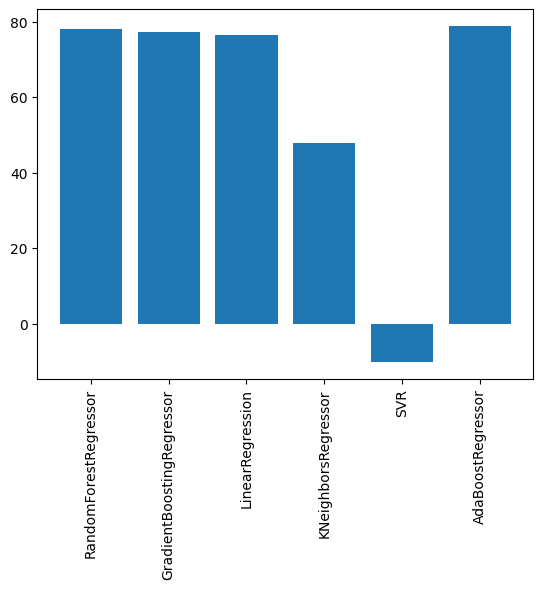

In [38]:
plt.bar(x=plotting['Mod'],height=plotting['Accuracy'])
plt.xticks(rotation='vertical')

plt.show()

In [39]:
import seaborn as sns

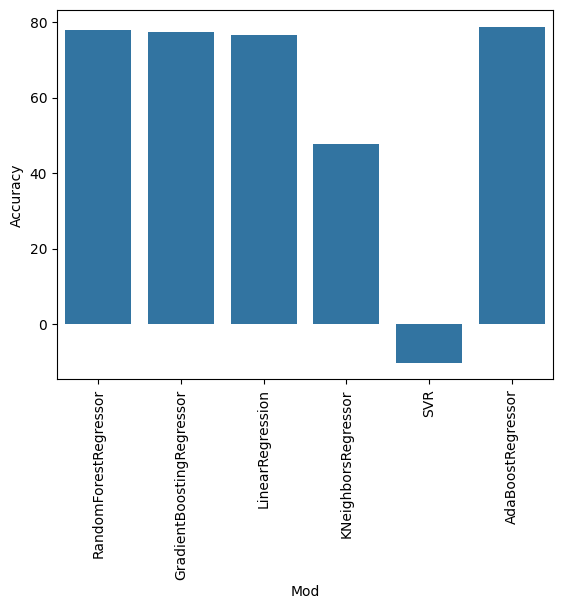

In [40]:
sns.barplot(x=plotting['Mod'],y=plotting['Accuracy'])
plt.xticks(rotation='vertical')

plt.show()

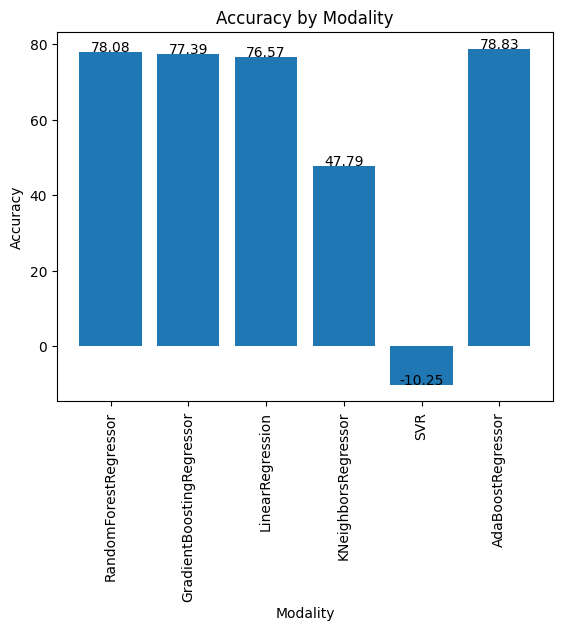

In [41]:

import matplotlib.pyplot as plt

# Assuming 'plotting' is a dictionary with 'Mod' and 'Accuracy' columns
plt.bar(x=plotting['Mod'], height=plotting['Accuracy'])
plt.xticks(rotation='vertical')  # Rotate x-axis labels

# Add accuracy labels using plt.text
for i, (v, label) in enumerate(zip(plotting['Accuracy'], plotting['Mod'])):
  y_pos = v + 0.1  # Adjust y position for label placement
  plt.text(i, y_pos, f"{v:.2f}", ha='center')  # Format accuracy with 2 decimal places

plt.xlabel("Modality")
plt.ylabel("Accuracy")
plt.title("Accuracy by Modality")
plt.show()

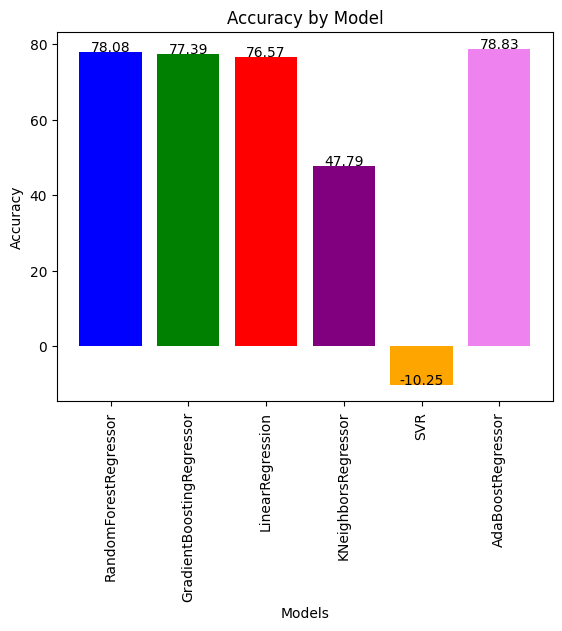

In [42]:
import matplotlib.pyplot as plt

# Assuming 'plotting' is a dictionary with 'Mod' and 'Accuracy' columns

# Define a color list
colors = ['blue', 'green', 'red', 'purple', 'orange','violet']  # Adjust colors and length as needed

# Create the bar plot with custom colors
plt.bar(x=plotting['Mod'], height=plotting['Accuracy'], color=colors[:len(plotting['Mod'])])

# Rotate x-axis labels (optional)
plt.xticks(rotation='vertical')  
for i, (v, label) in enumerate(zip(plotting['Accuracy'], plotting['Mod'])):
  y_pos = v + 0.1  # Adjust y position for label placement
  plt.text(i, y_pos, f"{v:.2f}", ha='center')  # Format accuracy with 2 decimal places


# Add accuracy labels using plt.text (optional)
# ... (code for adding accuracy labels remains the same)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy by Model")
plt.show()

In [84]:
plt.style.use(style='fivethirtyeight')

In [50]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [44]:
from sklearn.ensemble import VotingRegressor

In [45]:
voting_reg = VotingRegressor(estimators=[('linear', clf3),  ('svr', clf), ('xgb', clf2), ('rf', clf6)],
                             n_jobs=10)

In [106]:
(np.mean(cross_val_score(voting_reg,x,y,cv=7,scoring='r2'))*100)-m[5]*100

1.5415631349492003

In [107]:
0.0154*6.3

0.09702

In [46]:
np.mean(cross_val_score(voting_reg,x,y,cv=7,scoring='r2'))*100

80.67400760976624